# Salaries Data


What we have here is Salaries data of various government employees. We will try to find the desparities in the compensation model of 2 most significant forces out there who put their life on stake for the smooth functioning of society. We are refering to police force and fire department.

#  Importing libraries and eyeballing data

In [27]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

In [2]:
Data = pd.read_csv('Salaries.csv')

C:\Users\HP-PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


So the system has given us warning off the bat about the presence of mixed types in some of the columns, lets fix that first.

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


# Looking for inconsistent data

In [3]:
Data['BasePay'].value_counts(dropna=False,ascending = False)

0.0          875
NaN          605
0.00         423
54703.00     327
55026.0      297
            ... 
118170.12      1
66131.78       1
118177.59      1
118182.11      1
88098.02       1
Name: BasePay, Length: 109901, dtype: int64

In [4]:
Data['BasePay'] = pd.to_numeric(Data['BasePay'], errors='coerce')

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 14.7+ MB


In [11]:
Data[Data['BasePay']== 0]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
2896,2897,JOHN PAYNE,MANAGER VII,0.0,0,142245,NaN,142245.22,142245.22,2011,NaN,San Francisco,NaN
3263,3264,LAWRENCE BADINER,MANAGER VI,0.0,0,138192,NaN,138191.99,138191.99,2011,NaN,San Francisco,NaN
19058,19059,PETER LEONARD,FIRE FIGHTER PARAMEDIC,0.0,1630.2,64356,NaN,65986.23,65986.23,2011,NaN,San Francisco,NaN
20834,20835,MICHAEL COLLINS,POLICE OFFICER II,0.0,7815.78,52820.8,NaN,60636.55,60636.55,2011,NaN,San Francisco,NaN
21658,21659,LINDA ZIMMERMAN,PUBLIC HEALTH NURSE,0.0,0,58441.6,NaN,58441.60,58441.60,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148645,148646,Carolyn A Wilson,Human Services Technician,0.0,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148647,148648,Joann Anderson,Communications Dispatcher 2,0.0,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148648,148649,Leon Walker,Custodian,0.0,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148649,148650,Roy I Tillery,Custodian,0.0,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT


In [13]:
Data[Data['JobTitle'] == 'POLICE OFFICER II'][:5]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
228,229,SAM YUEN,POLICE OFFICER II,110242.81,16939,75533.1,NaN,202714.92,202714.92,2011,NaN,San Francisco,NaN
646,647,CHRISTOPHER PORTER,POLICE OFFICER II,105562.40,10535.3,64971.1,NaN,181068.80,181068.80,2011,NaN,San Francisco,NaN
873,874,MICHAEL ELLIS,POLICE OFFICER II,109749.06,33568.4,30837.8,NaN,174155.24,174155.24,2011,NaN,San Francisco,NaN
896,897,PAUL SCHLOTFELDT,POLICE OFFICER II,63721.66,16357.5,93158.1,NaN,173237.23,173237.23,2011,NaN,San Francisco,NaN
977,978,GABRIEL ALCARAZ,POLICE OFFICER II,110118.84,32981.9,27162.7,NaN,170263.45,170263.45,2011,NaN,San Francisco,NaN


In [5]:
Zero_police = Data[(Data['JobTitle'].str.contains('POLICE')) & (Data['BasePay'] == 0)]
Zero_police.shape[0]

8

In [6]:
Zero_fire = Data[(Data['JobTitle'].str.contains('FIRE')) & (Data['BasePay'] == 0)]
Zero_fire.shape[0]

14

In [7]:
Police_data = Data[Data['JobTitle'].str.contains('POLICE')]

In [8]:
Fire_data = Data[Data['JobTitle'].str.contains('FIRE')]

In [9]:
Police_data.shape[0]

2512

In [10]:
Fire_data.shape[0]

1459

When it comes to police force there are 0.3% Police force with 0 base salary and for Fire dept. that number is 0.95%. This number can be an error or there can be some other reasons involved, but since that number is really small we are going to ignore these values in our analysis.

In [11]:
New_police = Police_data.drop(index=Zero_police.index.to_list())

In [12]:
New_fire = Fire_data.drop(index=Zero_fire.index.to_list())

In [13]:
New_police['BasePay'].max()

261717.6

In [14]:
New_police[New_police['BasePay'] == New_police['BasePay'].max()]['JobTitle']

28    DEPUTY CHIEF III (POLICE DEPARTMENT)
Name: JobTitle, dtype: object

In [15]:
New_fire[New_fire['BasePay'] == New_fire['BasePay'].max()]['JobTitle']

9    CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)
Name: JobTitle, dtype: object

In [16]:
New_police[New_police['BasePay'] == New_police['BasePay'].min()]['JobTitle']

35131    SENIOR POLICE COMMUNICATIONS DISPATCHER
Name: JobTitle, dtype: object

In [17]:
New_fire[New_fire['BasePay'] == New_fire['BasePay'].min()]['JobTitle']

33399    FIREFIGHTER
Name: JobTitle, dtype: object

It is a little dissapointing to know that a firefighter who is actually present on the cite of disaster putting his life in danger has the least pay in his department.

In [18]:
New_fire['JobTitle'].unique()

array(['DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)',
       'BATTALION CHIEF, (FIRE DEPARTMENT)',
       'CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)',
       'ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)',
       'CAPTAIN, FIRE SUPPRESSION', 'FIREFIGHTER',
       'LIEUTENANT, FIRE DEPARTMENT',
       'LIEUTENANT, BUREAU OF FIRE PREVENTION AND PUBLIC S',
       'FIRE FIGHTER PARAMEDIC',
       'INSPECTOR, BUREAU OF FIRE PREVENTION AND PUBLIC SA',
       'MARINE ENGINEER OF FIRE BOATS',
       'CAPTAIN, BUREAU OF FIRE PREVENTION AND PUBLIC SAFE',
       'INVESTIGATOR, BUREAU OF FIRE INVESTIGATION',
       'FIRE SAFETY INSPECTOR II', 'PILOT OF FIRE BOATS',
       'FIRE PROTECTION ENGINEER', 'FIRE RESCUE PARAMEDIC',
       'CHIEF FIRE ALARM DISPATCHER', 'FIRE ALARM DISPATCHER'],
      dtype=object)

# Plotting Data

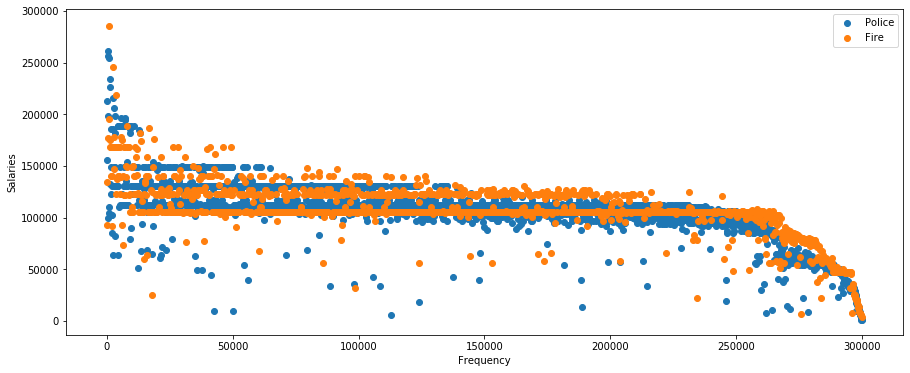

In [102]:
x1 = np.linspace(1,300000,2504)
x2 = np.linspace(1,300000,1445)
plt.figure(figsize=(15,6))
plt.scatter(x1,New_police['BasePay'], label = 'Police')
plt.scatter(x2,New_fire['BasePay'], label = 'Fire')
plt.xlabel('Frequency')
plt.ylabel('Salaries')
plt.legend()

Looks like there are more number of police personals earning more than 200K than fire dept. personals.


In [19]:
New_fire['BasePay'].mean()

107581.58047058816

In [20]:
New_police['BasePay'].mean()

106319.81290335458

The Mean Salary of Fire dept. looks slightly higher, but they look quite close to each other. This difference can also be caused due to outliers. To take care of that we will take a random sample of 60 values.

In [24]:
Sample_size = 60
Fire_sample = np.random.choice(New_fire['BasePay'], Sample_size, replace=False)
Police_sample = np.random.choice(New_police['BasePay'], Sample_size, replace=False)

In [30]:
def compare_means(arr1, arr2, alpha):
    stat,p = ttest_ind(arr1, arr2)
    print('Pvalue = %.3f'%(p))
    if p > alpha:
        print('There\'s no significant difference between the 2 distributions')
    else:
        print('The distribution has significant difference')

In [31]:
compare_means(Fire_sample, Police_sample, 0.05)

Pvalue = 0.687
There's no significant difference between the 2 distributions


# Conclusion

There is no significant difference between the salaries of fire dept. and police dept.